# Chapter 2: R Tidyverse Programming Basics

[JP Gannon](https://jpgannon.github.io/)
[](https://orcid.org/0000-0002-4595-3214)
([Virginia Tech](https://www.vt.edu/))  
2025-12-10

Get this document and a version with empty code chunks at the template
repository on github:
<https://github.com/VT-Hydroinformatics/2-Programming-Basics>

## Introduction

We have messed around with plotting a bit and you’ve seen a little of
what R can do. So now let’s review or introduce you to some basics. Even
if you have worked in R before, it is good to be remind of/practice with
this stuff, so stay tuned in!

This exercise covers most of the same principles as two chapters in R
for Data Science

Workflow: basics (<https://r4ds.hadley.nz/workflow-basics>)

Data transformation (<https://r4ds.hadley.nz/data-transform>)

## You can use R as a calculator

If you just type numbers and operators in, R will spit out the results

In [1]:
1 + 2

3

## You can create new objects using \<-

Yea yea, = does the same thing. But use \<-. We will call \<- assignment
or assignment operator. When we are coding in R we use \<- to assign
values to objects and = to set values for parameters in functions. Using
\<- helps us differentiate between the two. Norms for formatting are
important because they help us understand what code is doing, especially
when stuff gets complex.

Oh, one more thing: Surround operators with spaces. Don’t code like a
gorilla.

x \<- 1 looks better than x\<-1 and if you disagree you are wrong. :)

You can assign single numbers or entire chunks of data using \<-

So if you had an object called my_data and wanted to copy it into
my_new_data you could do:

my_new_data \<- my_data

You can then recall/print the values in an object by just typing the
name by itself.

In the code chunk below, assign a 3 to the object “y” and then print it
out.

In [2]:
y <- 3
y

3

If you want to assign multiple values, you have to put them in the
function c() c means combine. R doesn’t know what to do if you just give
it a bunch of values with space or commas, but if you put them as
arguments in the combine function, it’ll make them into a vector.

Any time you need to use several values, even passing as an argument to
a function, you have to put them in c() or it won’t work.

In [3]:
a <- c(1,2,3,4)
a

1 2 3 4

When you are creating objects, try to give them meaningful names so you
can remember what they are. You can’t have spaces or operators that mean
something else as part of a name. And remember, everything is case
sensitive.

Assign the value 5.4 to water_pH and then try to recall it by typing
“water_ph”

In [4]:
water_pH <- 5.4

#water_ph

You can also set objects equal to strings, or values that have letters
in them. To do this you just have to put the value in quotes, otherwise
R will think it is an object name and tell you it doesn’t exist.

Try: name \<- “JP” and then name \<- JP

What happens if you forget the ending parenthesis?

Try: name \<- “JP

R can be cryptic with it’s error messages or other responses, but once
you get used to them, you know exactly what is wrong when they pop up.

In [5]:
name <- "JP"
#name <- JP

## Using functions

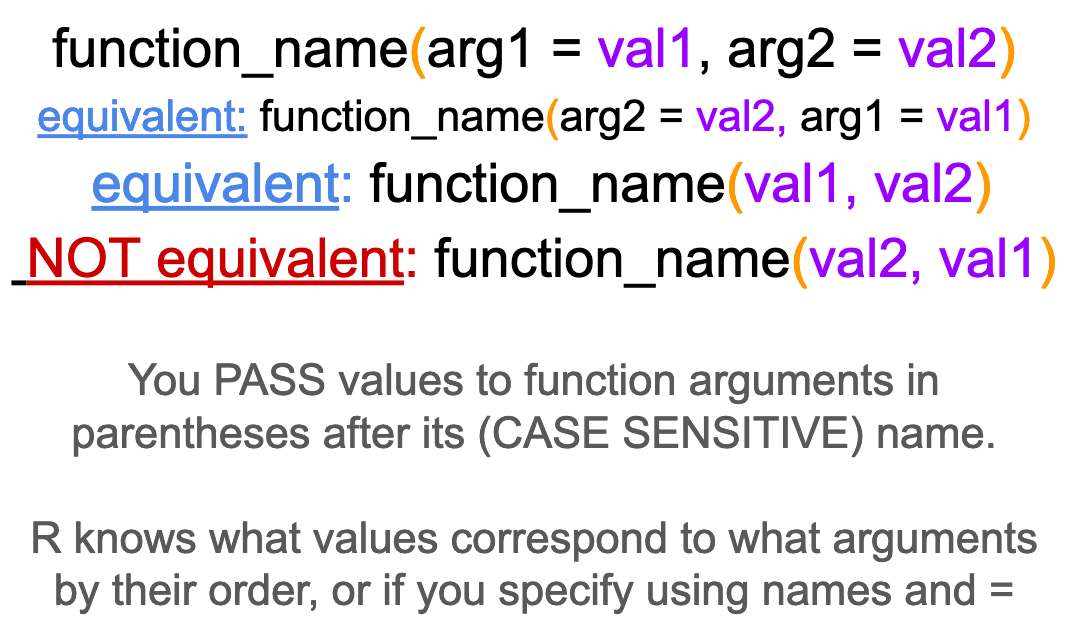

As an example, let’s try the seq() function, which creates a sequence of
numbers.

In [6]:
seq(from = 1, to = 10, by = 1)

#or

seq(1, 10, 1)

#or

seq(1, 10)

#what does this do
seq(10,1)

1 2 3 4 5 6 7 8 9 10

1 2 3 4 5 6 7 8 9 10

1 2 3 4 5 6 7 8 9 10

10 9 8 7 6 5 4 3 2 1

## Read in some data.

For the following demonstration we will use the RBI data from a sample
of USGS gages we used last class. First we will load the tidyverse
library, everything we have done so far is in base R.

Important: read_csv() is the tidyverse csv reading function, the base R
function is read.csv(). read.csv() will not read your data in as a
tibble, which is the format used by tidyverse functions.

In [7]:
library(tidyverse)

rbi <- read_csv("Flashy_Dat_Subset.csv")

Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 49 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STAN

## Wait, hold up. What is a tibble?

Good question. It’s a fancy way to store data that works well with
tidyverse functions. Let’s look at the rbi tibble.

In [8]:
head(rbi)

Now read in the same data with read.csv() which will NOT read the data
as a tibble. How is it different? Output each one in the Console.

Knowing the data type for each column is super helpful for a few
reasons…. let’s talk about them.

Types: int, dbl, fctr, char, logical

In [9]:
rbi_NT <- read.csv("Flashy_Dat_Subset.csv")

head(rbi_NT)

## Data wrangling in dplyr

If you forget syntax or what the following functions do, here is an
excellent cheat sheet:
<https://rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf>

We will demo five functions below:

-   **filter()** - returns rows that meet specified conditions
-   **arrange()** - reorders rows
-   **select()** - pull out variables (columns)
-   **mutate()** - create new variables (columns) or reformat existing
    ones
-   **summarize()** - collapse groups of values into summary stats

With all of these, the first argument is the data and then the arguments
after that specify what you want the function to do.

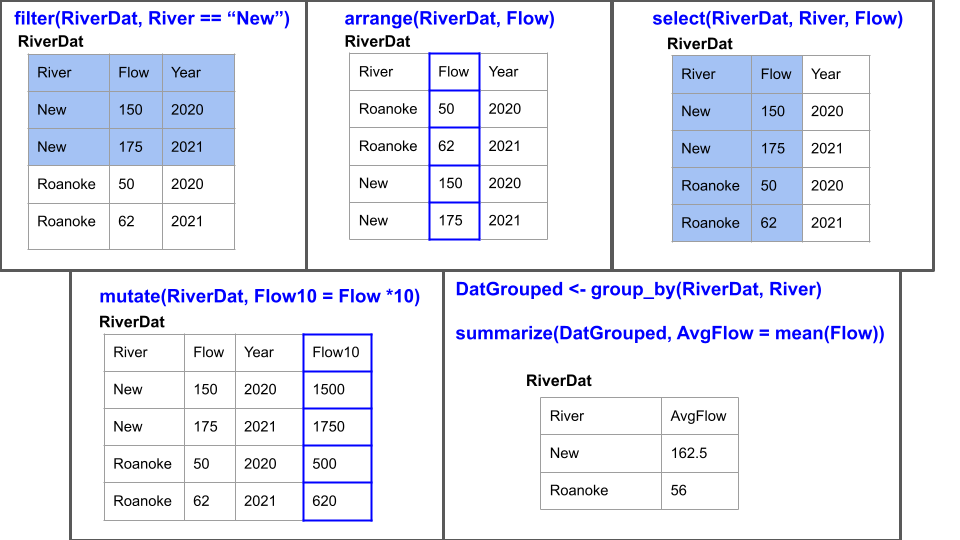

## Filter

Write an expression that returns data in rbi for the state of Maine (ME)

Operators:  
== equal  
!= not equal  
\>= , \<= greater than or equal to, less than or equal to  
\>, \< greater than or less then  
%in% included in a list of values  
& and  
\| or

In [10]:
filter(rbi, STATE == "ME")

**Multiple conditions**

How many gages are there in Maine with an rbi greater than 0.25

In [11]:
filter(rbi, STATE == "ME" & RBI > 0.25)

## Arrange

Arrange sorts by a column in your dataset.

Sort the rbi data by the RBI column in ascending and then descending
order

In [12]:
arrange(rbi, RBI)

arrange(rbi, desc(RBI))

## Select

There are too many columns! You will often want to do this when you are
manipulating the structure of your data and need to trim it down to only
include what you will use.

Select Site name, state, and RBI from the rbi data

Note they come back in the order you put them in in the function, not
the order they were in in the original data.

You can do a lot more with select, especially when you need to select a
bunch of columns but don’t want to type them all out. But we don’t need
to cover all that today. For a taste though, if you want to select a
group of columns you can specify the first and last with a colon in
between (first:last) and it’ll return all of them. Select the rbi
columns from site_no to DRAIN_SQKM.

In [13]:
select(rbi, STANAME, STATE, RBI)

select(rbi, site_no:DRAIN_SQKM)

## Mutate

Use mutate to add new columns based on additional ones. Common uses are
to create a column of data in different units, or to calculate something
based on two columns. You can also use it to just update a column, by
naming the new column the same as the original one (but be careful
because you’ll lose the original one!). I commonly use this when I am
changing the datatype of a column, say from a character to a factor or a
string to a date.

Create a new column in rbi called T_RANGE by subtracting T_MIN_SITE from
T_MAX_SITE

In [14]:
mutate(rbi, T_RANGE = T_MAX_SITE - T_MIN_SITE)

When downloading data from the USGS through R, you have to enter the
gage ID as a character, even though they are all made up of numbers. So
to practice doing this, update the site_no column to be a character
datatype

In [15]:
mutate(rbi, site_no = as.character(site_no))

## Summarize

Summarize will perform an operation on all of your data, or groups if
you assign groups.

Use summarize to compute the mean, min, and max rbi

In [16]:
summarize(rbi, meanrbi = mean(RBI), maxrbi = max(RBI), minrbi = min(RBI))

Now use the group function to group by state and then summarize in the
same way as above

In [17]:
rbistate <- group_by(rbi, STATE)
summarize(rbistate, meanrbi = mean(RBI), maxrbi = max(RBI), minrbi = min(RBI))

## Multiple operations with pipes

The pipe operator \|\> allows you to perform multiple operations in a
sequence without saving intermediate steps. Not only is this more
efficient, but structuring operations with pipes is also more intuitive
than nesting functions within functions (the other way you can do
multiple operations). The \|\> pipe is included in base R, if you see
code elsewhere that has a %\>% pipe, that is the original pipe, from the
magrittr package. It was incorporated into base R and is now \|\> but
works the same!

**Let’s say we want to tell R to make a PB&J sandwich by using the
pbbread(), jbread(), and joinslices() functions and the data
“ingredients”. If we do this saving each step if would look like this:**

> sando \<- pbbread(ingredients)

> sando \<- jbread(sando)

> sando \<- joinslices(sando)

**If we nest the functions together we get this**

> joinslice(jbread(pbbread(ingredients)))

Efficient… but tough to read/interpret

**Using the pipe it would look like this**

> ingredients\|\>  
> pbbread() \|\>  
> jbread() \|\>  
> joinslices()

Much easier to follow!

**When you use the pipe, it basically takes whatever came out of the
first function and puts it into the data argument for the next one**

**so rbi \|\> group_by(STATE) is the same as group_by(rbi, STATE)**

Take the groupby and summarize code from above and perform the operation
using the pipe

In [18]:
rbi |>
  group_by(STATE) |>
  summarize(meanrbi = mean(RBI), maxrbi = max(RBI), minrbi = min(RBI))

## Save your results to a new tibble

We have just been writing everything to the screen so we can see what we
are doing… In order to save anything we do with these functions to work
with it later, we just have to use the assignment operator (\<-) to
store the data.

One kind of awesome thing about the assignment operator is that it works
both ways…

x \<- 3 and 3 -\> x do the same thing (WHAT?!)

So you can do the assignment at the beginning of the end of your dplyr
workings, whatever you like best.

Use the assignment operator to save the summary table you just made.

In [19]:
stateRBIs <- rbi |>
  group_by(STATE) |>
  summarize(meanrbi = mean(RBI), maxrbi = max(RBI), minrbi = min(RBI))

# Notice when you do this it doesn't output the result... 
# You can see what you did by clickon in stateRBIs in your environment panel
# or just type stateRBIs

stateRBIs

## What about NAs?

We will talk more about this when we discuss stats, but some operations
will fail if there are NA’s in the data. If appropriate, you can tell
functions like mean() to ignore NAs. You can also use drop_na() if
you’re working with a tibble. But be aware if you use that and save the
result, drop_na() gets rid of the whole row, not just the NA. Because
what would you replace it with…. an NA?

In [20]:
x <- c(1,2,3,4,NA)
mean(x, na.rm = TRUE)

2.5

## What are some things you think I’ll ask you to do for the activity next class?